In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [209]:
cancer = pd.read_csv(r'C:\\Users\\Nullvoid\\Desktop\\cancer\survey lung cancer.csv')
cancer.head()  


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [210]:
cancer.shape 


(309, 16)

In [211]:
cancer.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [212]:
cancer.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [213]:
cancer.describe() 

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [214]:
cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [215]:
cancer.duplicated().sum()

33

In [216]:
cancer['GENDER'] = le.fit_transform(cancer['GENDER'])
cancer['LUNG_CANCER'] = le.fit_transform(cancer['LUNG_CANCER'])
cancer.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


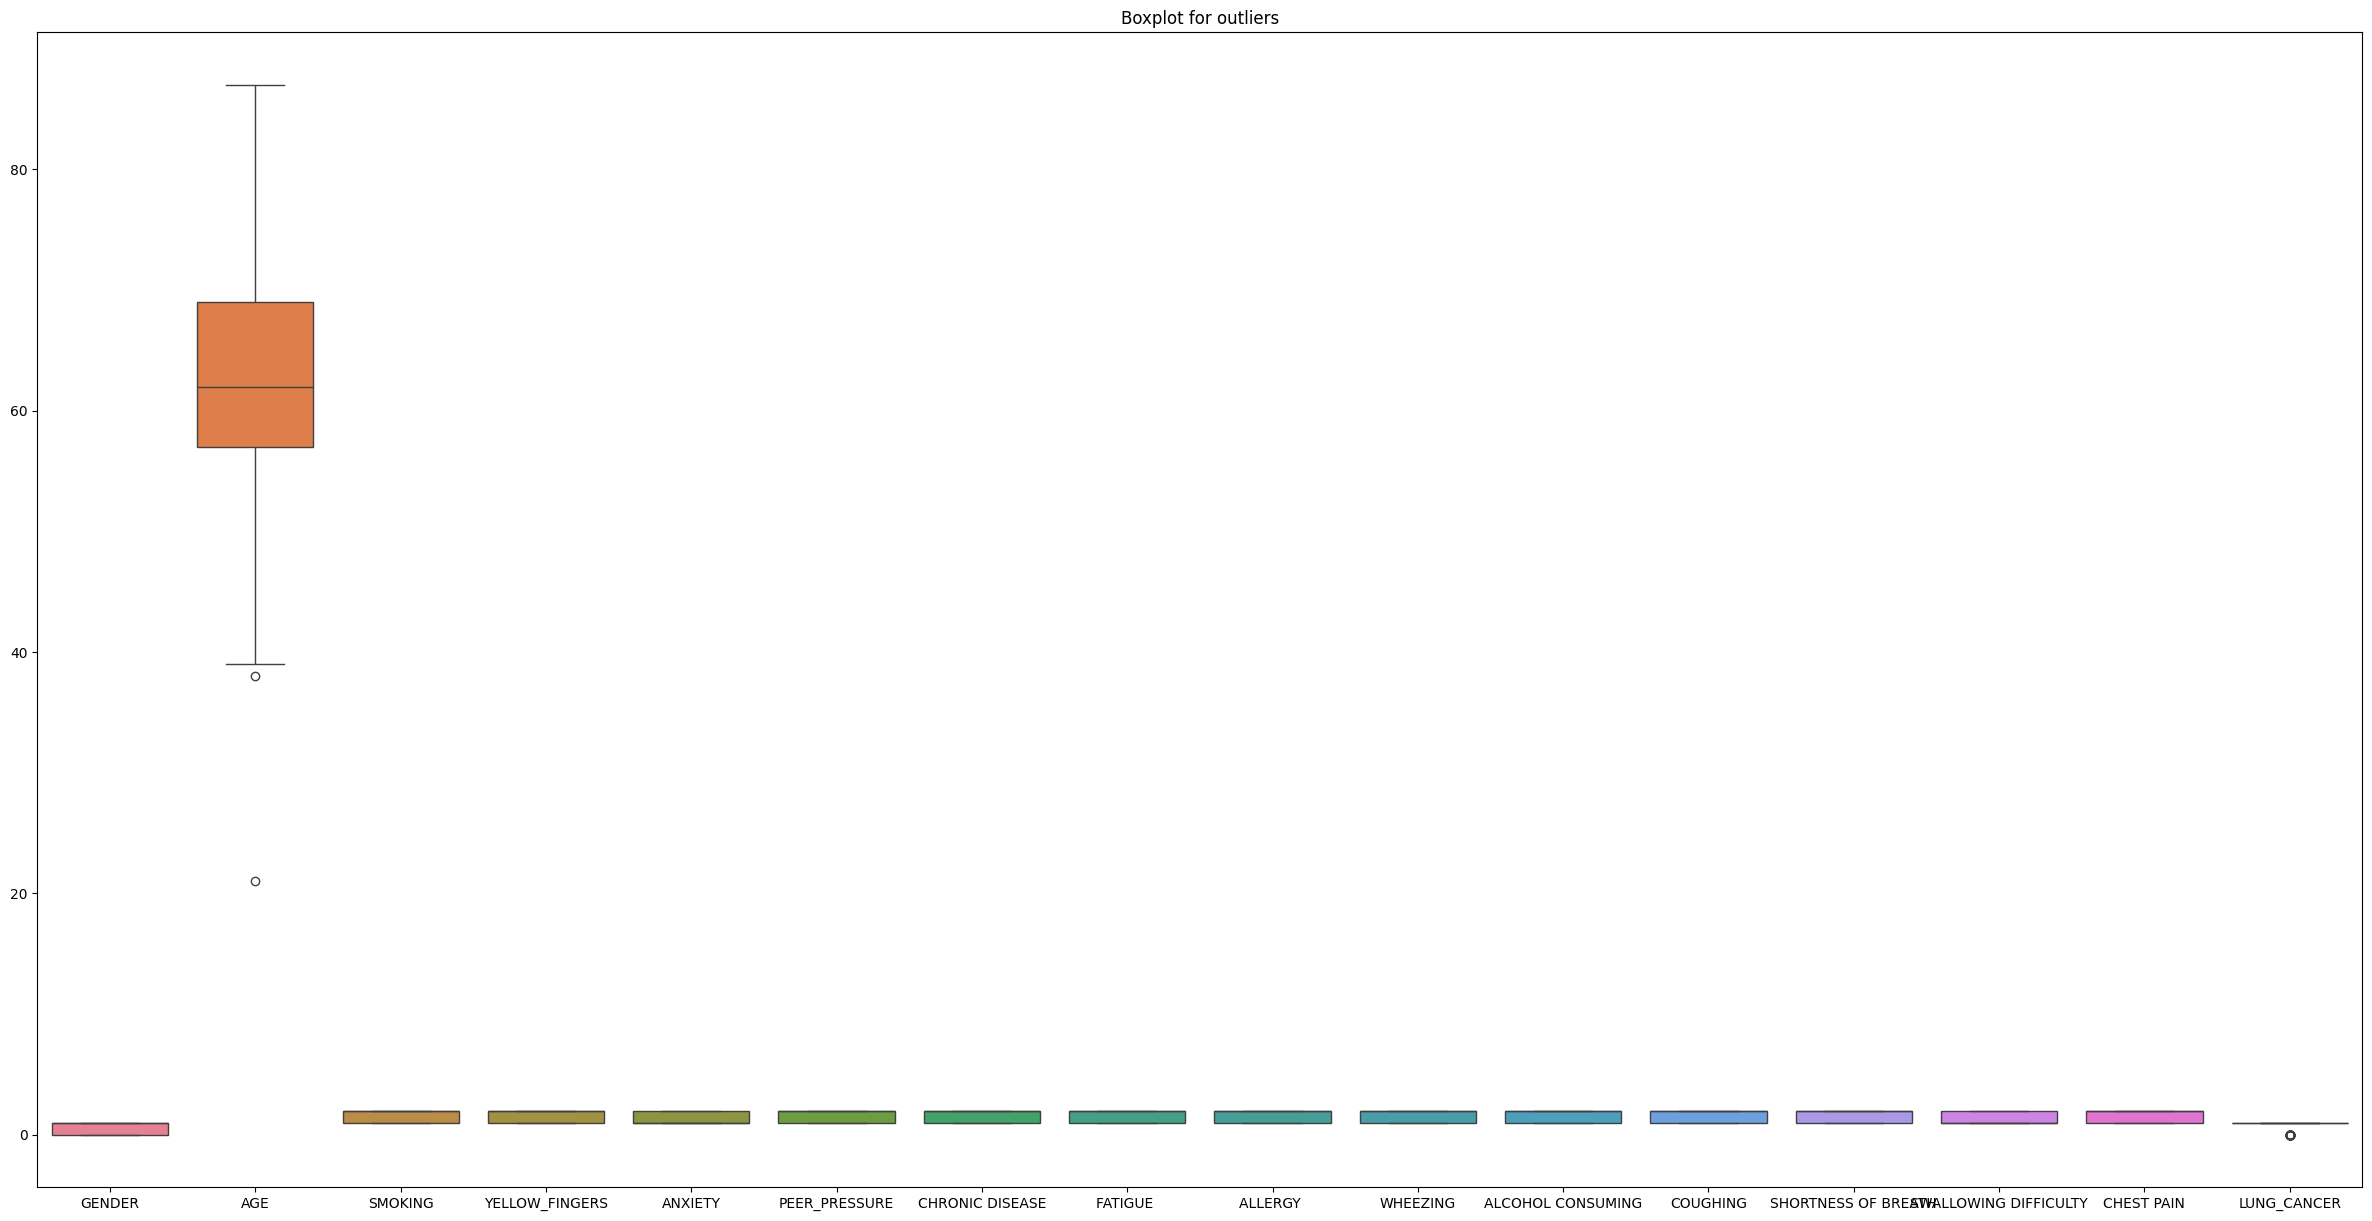

In [217]:
# looking for outliers 
# looking for outliers 
plt.figure(figsize = (30,15))
sns.boxplot(data = cancer)
plt.title('Boxplot for outliers')
plt.show()

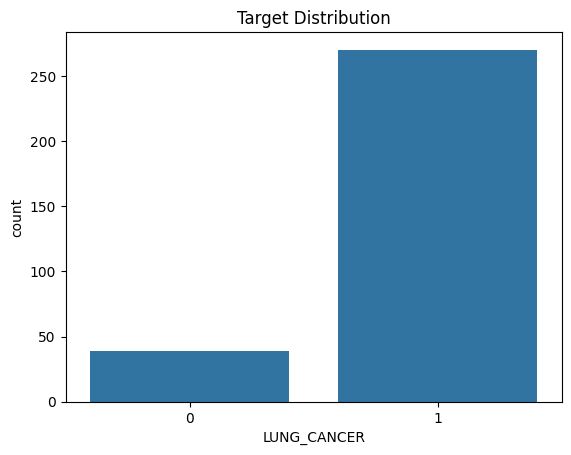

In [218]:
# the distribution of the target variable 
sns.countplot(x = 'LUNG_CANCER', data = cancer)
plt.title('Target Distribution')
plt.show()

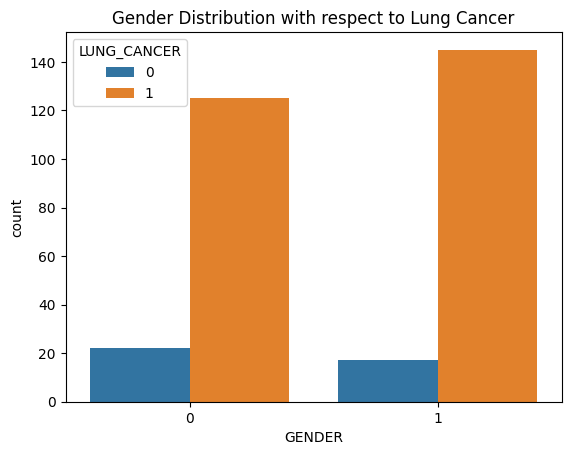

In [245]:
# visualizations of gender distribution with respect to lung cancer
sns.countplot(x = 'GENDER', hue = 'LUNG_CANCER', data = cancer)
plt.title('Gender Distribution with respect to Lung Cancer')
plt.show()

In [219]:
cancer_new = cancer.drop(columns=['GENDER','AGE'])
cancer_new.head()

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [220]:
cn = cancer_new.corr()
cn

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
SMOKING,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300
ALCOHOL CONSUMING,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533
COUGHING,-0.129471,-0.012640,-0.225644,-0.089019,-0.175287,0.146856,0.189524,0.374265,0.202720,1.000000,0.277385,-0.157586,0.083958,0.248570


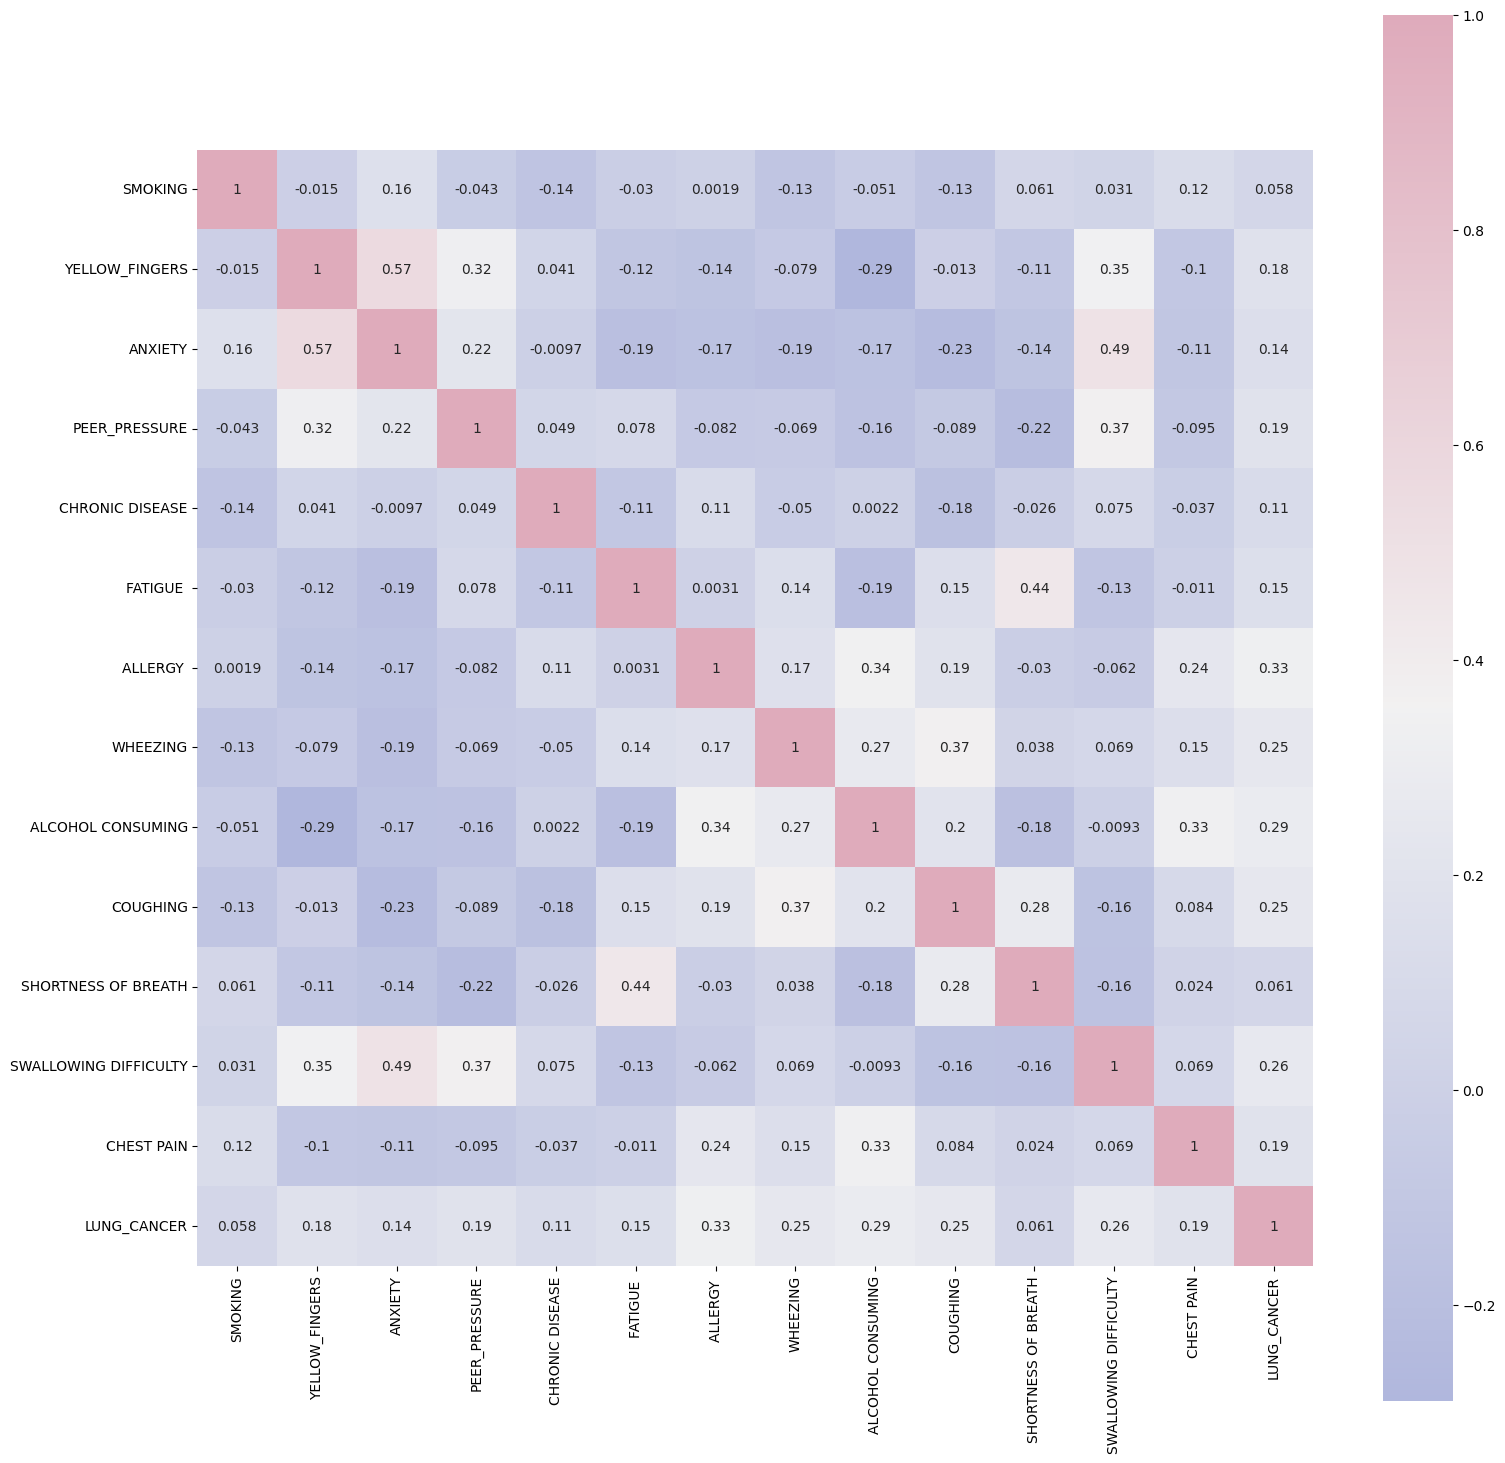

In [221]:
# correlation 
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn, cmap=cmap, annot=True, square=True)
plt.show()

In [222]:
# train_test_split
X = cancer_new.drop('LUNG_CANCER', axis = 1)
y = cancer_new['LUNG_CANCER']
X 
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

In [223]:
%pip install imbalanced-learn==0. 10. 1

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'imbalanced-learn==0.': Expected end or semicolon (after version specifier)
    imbalanced-learn==0.
                    ~~~^


In [224]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X, y)
print(f"\nAfter ADASYN (Training Set):")
print(f"Class 0: {sum(y_res==0)}")
print(f"Class 1: {sum(y_res==1)}")



After ADASYN (Training Set):
Class 0: 270
Class 1: 270


In [225]:
len(X)


309

In [226]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTest Set:")
print(f"Class 0 (No Cancer): {sum(y_test==0)}")
print(f"Class 1 (Cancer): {sum(y_test==1)}")



Test Set:
Class 0 (No Cancer): 8
Class 1 (Cancer): 54


In [227]:
# fitting the svc to the training dataset 
svc_model = SVC()
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [228]:
# predicting the results 
y_svc_pred = svc_model.predict(X_test)
y_svc_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [229]:
svc_cr = classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.91      0.94      0.93        54

    accuracy                           0.87        62
   macro avg       0.71      0.66      0.68        62
weighted avg       0.86      0.87      0.86        62



In [230]:
# random forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [231]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [232]:
rf_cr = classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.94      0.93      0.93        54

    accuracy                           0.89        62
   macro avg       0.75      0.78      0.76        62
weighted avg       0.89      0.89      0.89        62



In [233]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train )

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [234]:
y_log_pred = log_model.predict(X_test)
y_log_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [235]:
log_cr = classification_report(y_test, y_log_pred)
print(log_cr)

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.93      0.96      0.95        54

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



In [236]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [237]:
y_xgb_pred = xgb_model.predict(X_test)
y_xgb_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [238]:
xgb_cr = classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.96      0.93      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.84      0.81        62
weighted avg       0.91      0.90      0.91        62



In [239]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [240]:
y_mlp_pred = mlp_model.predict(X_test)
y_mlp_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [241]:
mlp_cr = classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.88      0.98      0.93        54

    accuracy                           0.87        62
   macro avg       0.69      0.55      0.56        62
weighted avg       0.83      0.87      0.84        62



In [242]:
# k_fold cross validation 
from sklearn.model_selection import KFold, cross_val_score
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# support vector classifier model 
svc_model_scores = cross_val_score(svc_model, X, y,cv=kf)
# random forest classifier model 
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)
# logistic regression classifier model 
log_model_score = cross_val_score(log_model,X, y,cv=kf)
#xgb boost classifier model 
xgb_model_score = cross_val_score(xgb_model, X, y, cv=kf)
#mlp classifier model 
mlp_model_score = cross_val_score(mlp_model, X, y, cv=kf)
print("Support Vector Classifier model average accuracy:", np.mean(svc_model_scores))
print("Random Forest Classifier model average accuracy:", np.mean(rf_model_scores))
print("Logistic Regression Classifier model average accuracy:", np.mean(log_model_score))
print("XGBoost model average accuracy:", np.mean(xgb_model_score))
print("Multi-perceptron model average accuracy:", np.mean(mlp_model_score))



Support Vector Classifier model average accuracy: 0.9095698924731183
Random Forest Classifier model average accuracy: 0.9029032258064517
Logistic Regression Classifier model average accuracy: 0.9192473118279569
XGBoost model average accuracy: 0.9029032258064517
Multi-perceptron model average accuracy: 0.8773118279569893


In [243]:
import joblib
# save a trained model object; replace `log_model` with the model you want to persist (svc_model, rf_model, xgb_model, mlp_model, etc.)
joblib.dump(log_model, "cancer.pkl")


['cancer.pkl']